In [1]:
from datetime import datetime, timedelta
import numpy as np
import random
import networkx as nx

from simulation_core.infrastructure import *
from simulation_core.signaling import *
from simulation_core.network import *
from simulation_core.train import *
from simulation_core.dispatching.Dispatcher import Dispatcher
from simulation_test.sim import *

from itertools import combinations, permutations

import matplotlib.pyplot as plt
import matplotlib.dates as mdates



sim_init_time = datetime.strptime('2018-01-10 10:00:00', "%Y-%m-%d %H:%M:%S")
sim_term_time = datetime.strptime('2018-01-10 15:30:00', "%Y-%m-%d %H:%M:%S")
spd_container = [random.uniform(0.01, 0.02) for i in range(20)]
acc_container = [0.5*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
dcc_container = [0.2*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
headway = 300 + random.random() * 400
sys = System(sim_init_time, spd_container, acc_container, dcc_container,
             term_time=sim_term_time,
             dos_period=['2018-01-10 11:30:00', '2018-01-10 12:30:00'],  
             dos_pos=(15,20),
             headway=headway, 
             refresh_time=50)

In [2]:
def launch(downtrain=True):
    while sys.sys_time - sys.init_time <= sys.term_time - sys.init_time:
        _semaphore_to_return = False
        for t in sys.trains:
            sys.dispatcher.request_routing(t)
            t.move()
        if sys.sys_time+sys.refresh_time - sys.last_train_init_time >= sys.headway:
            if downtrain:
                if not sys.signal_points[0].curr_train_with_route.keys():
                    if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[0],0)) for t in sys.trains]):
                        if not sys.signal_points[0].track_by_port[1].trains:
                            t = sys.dispatcher.generate_train( sys.signal_points[0],0,
                                                    sys.signal_points[10],1,
                                                    length=1)
            else:
                if not sys.signal_points[10].curr_train_with_route.keys():
                    if all([t.curr_routing_path_segment != ((None,None),(sys.signal_points[10],1)) for t in sys.trains]):
                        if not sys.signal_points[10].track_by_port[0].trains:
                            t = sys.dispatcher.generate_train( sys.signal_points[10],1,
                                                    sys.signal_points[0],0,
                                                    length=1)
        sys.sys_time+=sys.refresh_time
# launch(downtrain=True)
launch(downtrain=False)

train idx: 0 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 50.0
	route (1, 0) of CtrlPnt10 is opened
train train idx: 0 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00 initiated, entering into Track <MP: 45.0~50.0 > <AutoPnt 9 port: 1~CtrlPnt10 port: 0> key: 0
	route (1, 0) of CtrlPnt10 is closed
train idx: 0 occupying:[((CtrlPnt10, 0), (AutoPnt 9, 1)), ((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 40.0
	route (1, 0) of CtrlPnt 8 is opened
train idx: 1 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 50.0
	route (1, 0) of CtrlPnt10 is opened
train train idx: 1 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00 initiated, entering into Track <MP: 45.0~50.0 > <AutoPnt 9 port: 1~CtrlPnt10 port: 0> key: 0
	route (1, 0) of CtrlPnt10 is closed
	route (1, 0) of CtrlPnt 8 is closed
train idx: 0 occupying:[((CtrlPnt 8, 0), (CtrlPn

	route (1, 2) of CtrlPnt 4 is closed
train idx: 2 occupying:[((CtrlPnt 4, 2), (CtrlPnt 3, 3)), ((CtrlPnt 5, 0), (CtrlPnt 4, 1))] head MP:19.93 rear MP:20.93, requested (3, 0) at 15.0
	route (3, 0) of CtrlPnt 3 is opened
	route (1, 2) of CtrlPnt 8 is closed
train idx: 5 occupying:[((CtrlPnt 8, 2), (AutoPnt12, 1)), ((AutoPnt 9, 0), (CtrlPnt 8, 1))] head MP:39.80 rear MP:40.80, requested (3, 0) at 25.0
	route (3, 0) of CtrlPnt 5 is opened
	route (1, 0) of CtrlPnt 6 is closed
train idx: 6 occupying:[((CtrlPnt10, 0), (AutoPnt 9, 1)), ((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00, requested (1, 0) at 40.0
	route (1, 0) of CtrlPnt 8 is opened
	route (1, 0) of CtrlPnt 2 is closed
train idx: 3 occupying:[((CtrlPnt 2, 0), (AutoPnt 1, 1)), ((CtrlPnt 3, 0), (CtrlPnt 2, 1))] head MP: 9.96 rear MP:10.96, requested (1, 0) at 0.0
	route (1, 0) of CtrlPnt 0 is opened
	route (3, 0) of CtrlPnt 3 is closed
train idx: 2 occupying:[((CtrlPnt 3, 0), (CtrlPnt 2, 1)), ((CtrlPnt 4, 2), (CtrlPnt 3,

	route (1, 0) of CtrlPnt 2 is closed
train idx: 6 occupying:[((CtrlPnt 2, 0), (AutoPnt 1, 1)), ((CtrlPnt 3, 0), (CtrlPnt 2, 1))] head MP: 9.74 rear MP:10.74, requested (1, 0) at 0.0
	route (1, 0) of CtrlPnt 0 is opened
	route (1, 0) of CtrlPnt 3 is closed
train idx: 7 occupying:[((CtrlPnt 3, 0), (CtrlPnt 2, 1)), ((CtrlPnt 4, 0), (CtrlPnt 3, 1))] head MP:14.98 rear MP:15.98, requested (1, 0) at 10.0
	route (1, 0) of CtrlPnt 2 is opened
	route (1, 0) of CtrlPnt 7 is closed
	route (1, 0) of CtrlPnt 5 is closed
train idx: 9 occupying:[((CtrlPnt 7, 0), (CtrlPnt 6, 1)), ((CtrlPnt 8, 0), (CtrlPnt 7, 1))] head MP:34.96 rear MP:35.96, requested (1, 0) at 30.0
	route (1, 0) of CtrlPnt 6 is opened
train idx: 8 occupying:[((CtrlPnt 5, 0), (CtrlPnt 4, 1)), ((CtrlPnt 6, 0), (CtrlPnt 5, 1))] head MP:24.79 rear MP:25.79, requested (1, 2) at 20.0
	route (1, 2) of CtrlPnt 4 is opened
	route (1, 0) of CtrlPnt 0 is closed
train idx:11 occupying:[((None, None), (CtrlPnt10, 1))] head MP:50.00 rear MP:51.00,

No handles with labels found to put in legend.


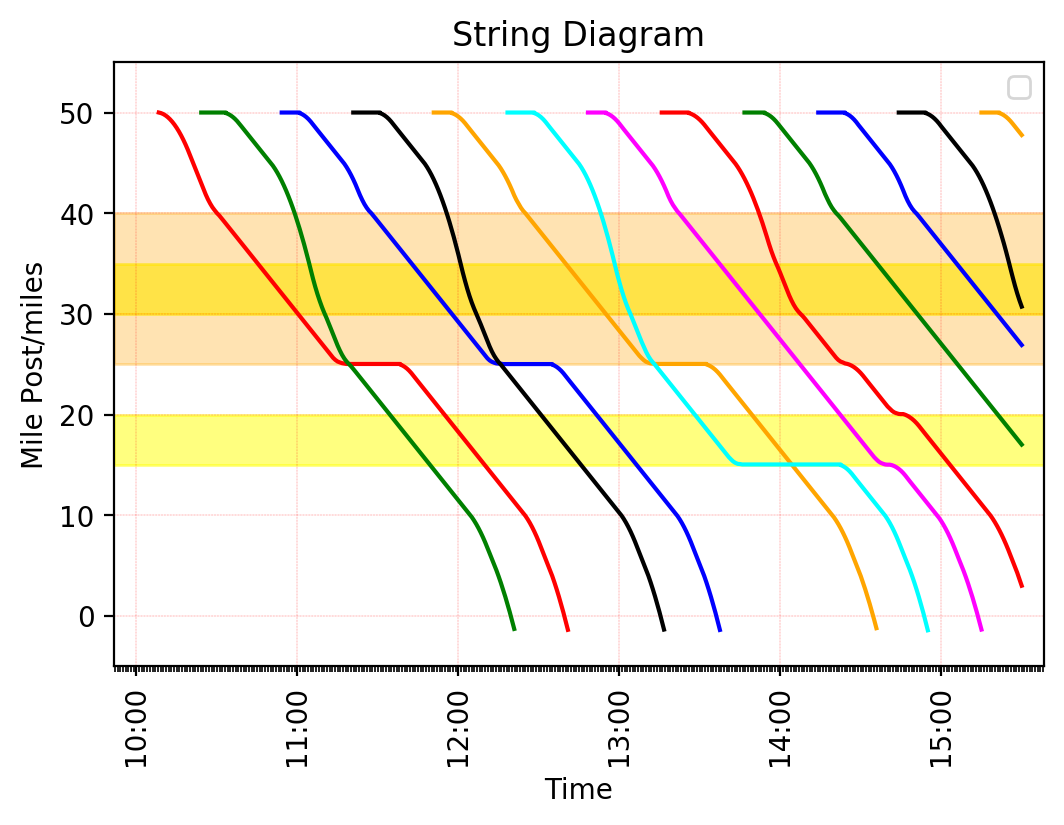

In [3]:
string_diagram(sys)

No handles with labels found to put in legend.


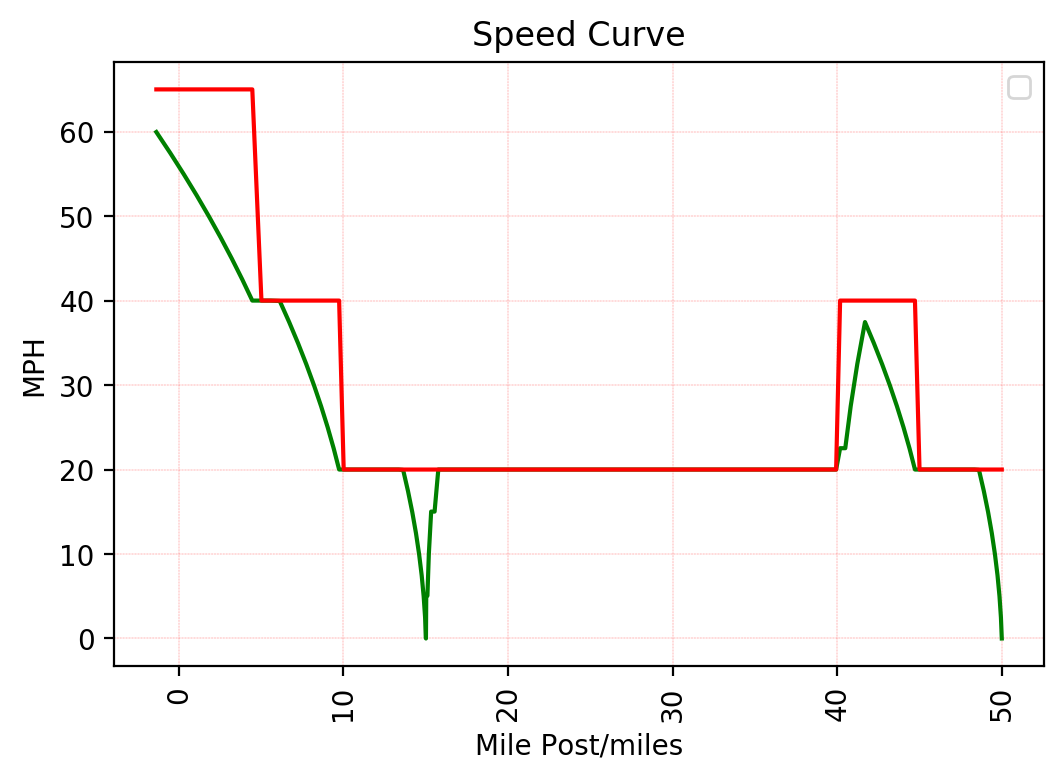

<Figure size 1440x1280 with 0 Axes>

In [4]:
speed_curve(sys,sys.trains[6])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


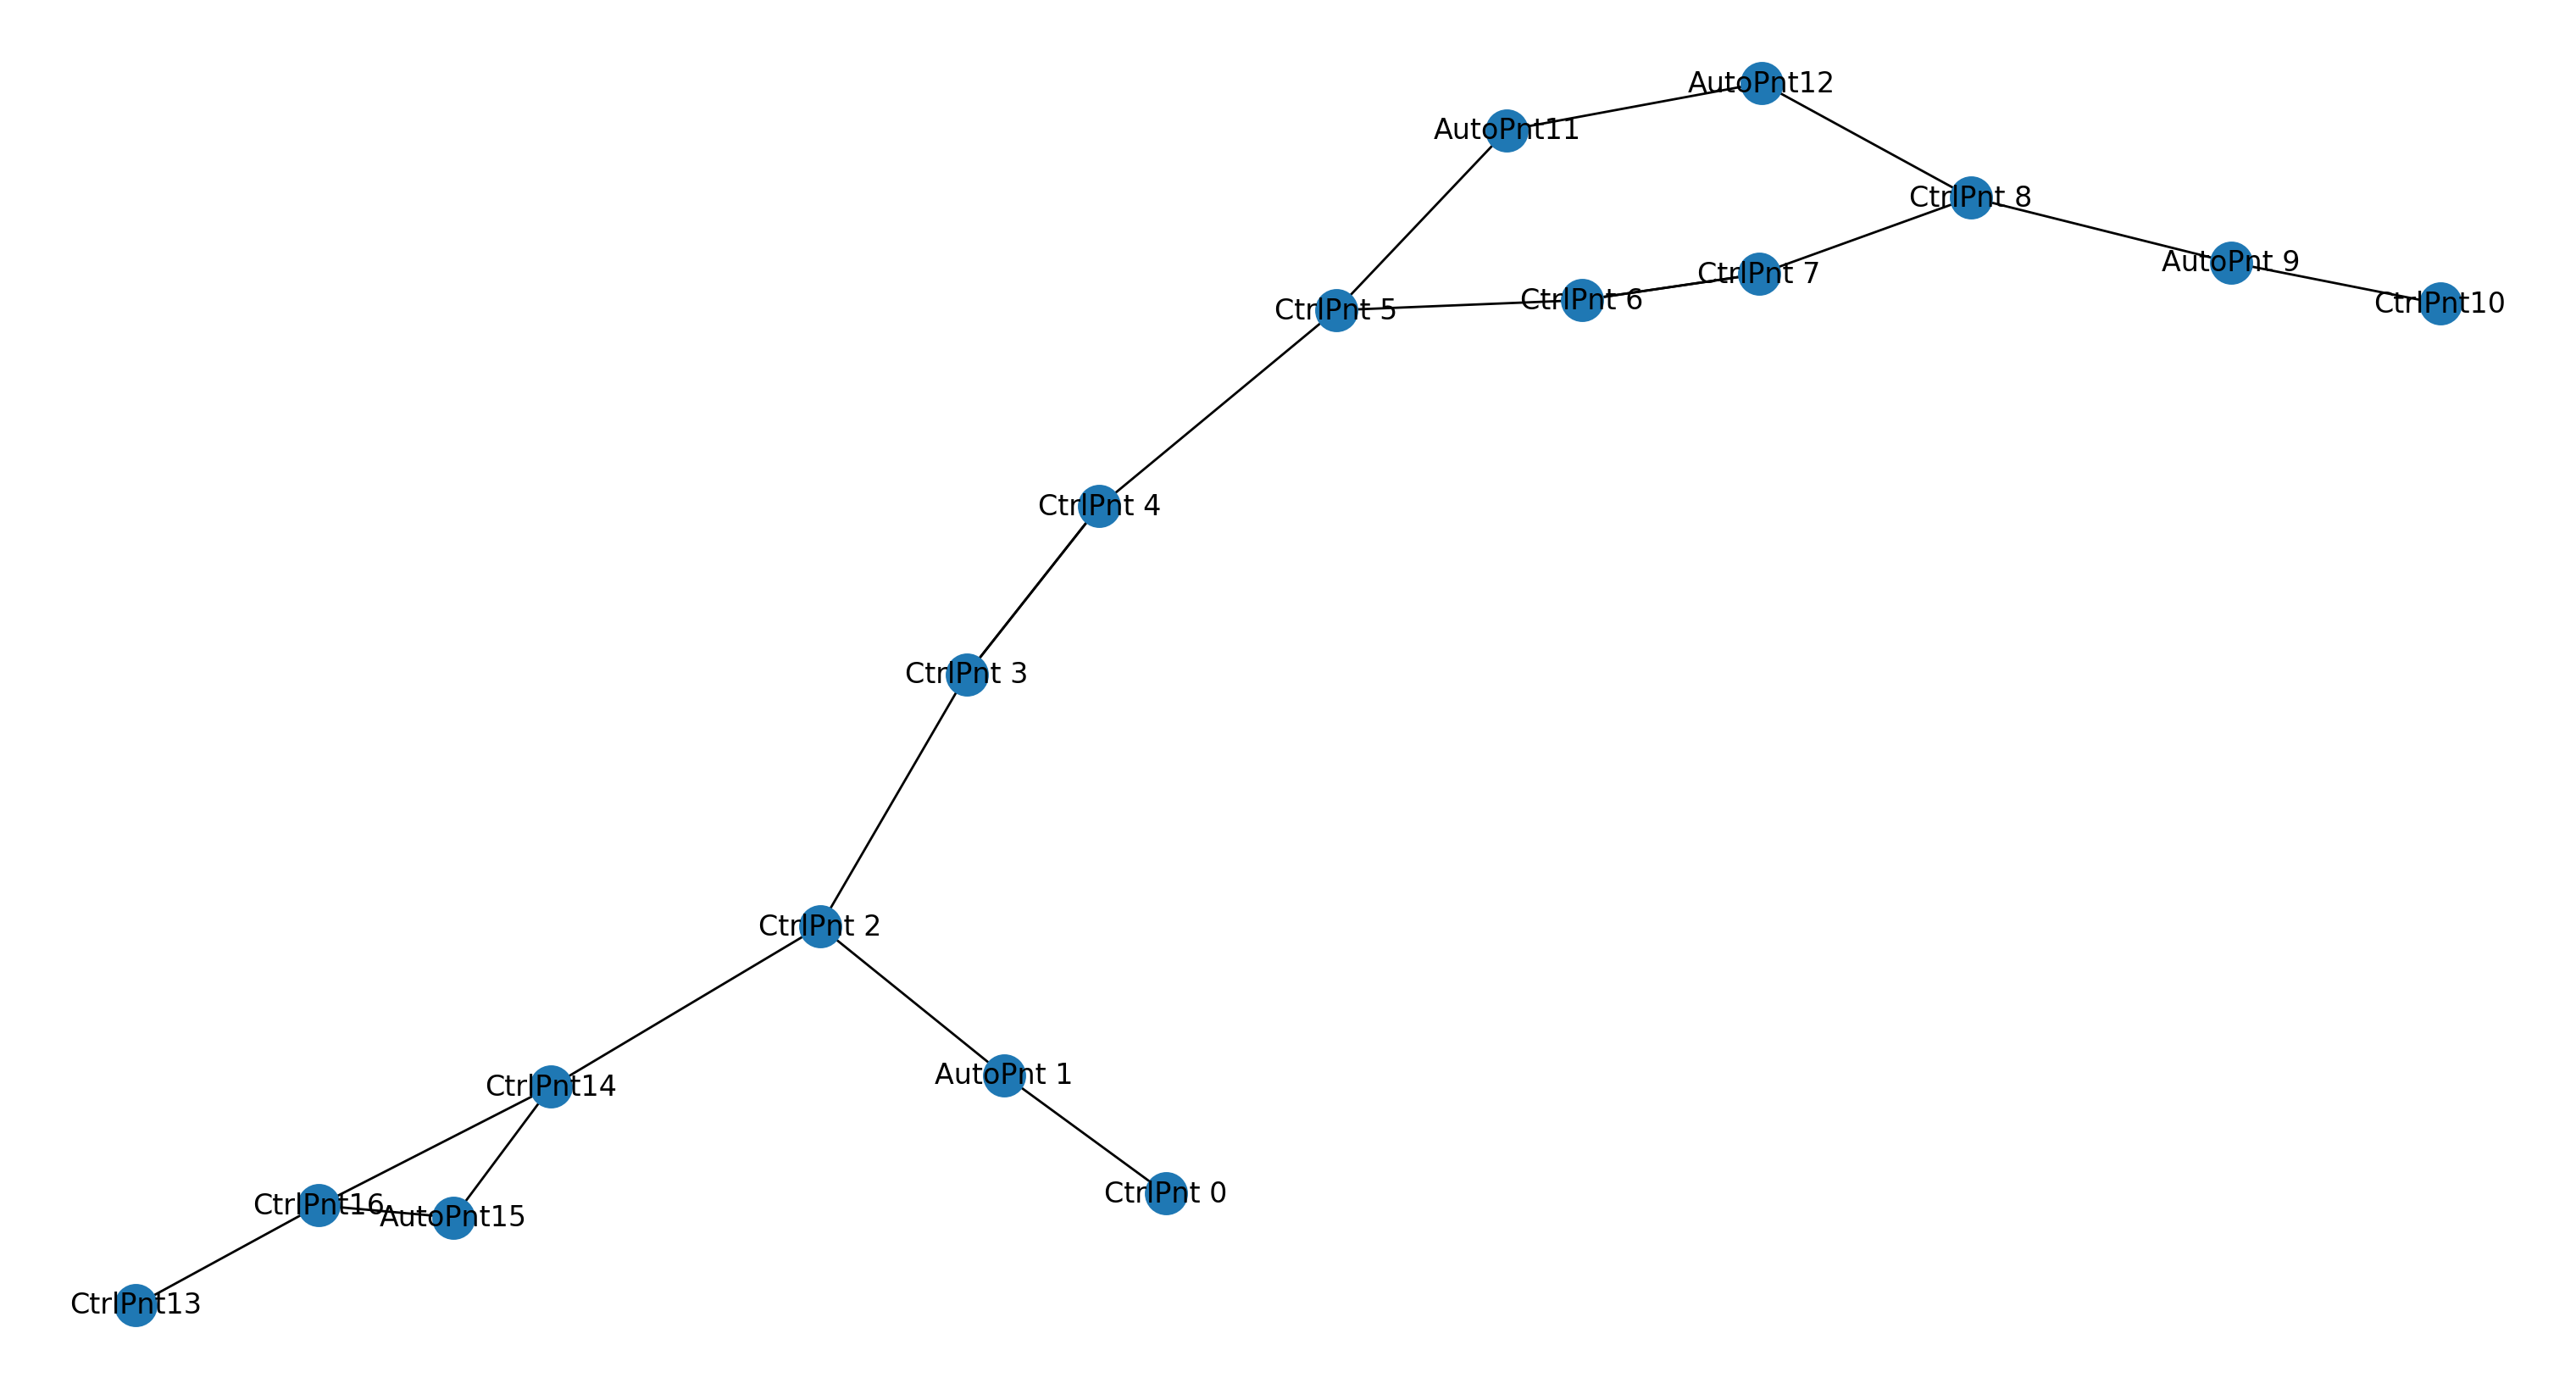

In [5]:
nx.draw(sys.G_origin, with_labels = True)

In [6]:
sys.dispatcher.get_route(sys.signal_points[8], 0, sys.signal_points[9],1,mainline=False)

[((CtrlPnt 7, 1), (CtrlPnt 8, 0)), ((CtrlPnt 8, 1), (CtrlPnt10, 0))]

In [7]:
sys.dispatcher.get_all_routes(sys.signal_points[8], 1, sys.signal_points[11], 0)

[[((CtrlPnt10, 0), (CtrlPnt 8, 1)), ((CtrlPnt 8, 2), (CtrlPnt 5, 3))]]

In [8]:
sys.dispatcher.get_route(sys.signal_points[8], 1, sys.signal_points[11], 0)

[((CtrlPnt10, 0), (CtrlPnt 8, 1)), ((CtrlPnt 8, 2), (CtrlPnt 5, 3))]

In [9]:
autopnts = [p for p in sys.signal_points if p not in sys.ctrl_points]

In [10]:
[t for _, t in autopnts[0].track_by_port.items()]

[Track <MP:  0.0~5.0  > <CtrlPnt 0 port: 1~AutoPnt 1 port: 0> key: 0,
 Track <MP:  5.0~10.0 > <AutoPnt 1 port: 1~CtrlPnt 2 port: 0> key: 0]

In [11]:
from simulation_core.network.network_utils import shortest_path, all_simple_paths, collect_banned_paths

In [12]:
for path in all_simple_paths(sys.G_origin, sys.signal_points[0], sys.signal_points[10]):
    for node_idx in range(len(path) - 1):
        for edge_idx in list(sys.G_origin[path[node_idx]][path[node_idx + 1]]):
            trk = sys.G_origin[path[node_idx]][path[node_idx + 1]][edge_idx]['instance']
            print(trk, trk.edge_key)

Track <MP:  0.0~5.0  > <CtrlPnt 0 port: 1~AutoPnt 1 port: 0> key: 0 0
Track <MP:  5.0~10.0 > <AutoPnt 1 port: 1~CtrlPnt 2 port: 0> key: 0 0
Track <MP: 10.0~15.0 > <CtrlPnt 2 port: 1~CtrlPnt 3 port: 0> key: 0 0
Track <MP: 15.0~20.0 > <CtrlPnt 3 port: 1~CtrlPnt 4 port: 0> key: 0 0
Track <MP: 15.0~20.0 > <CtrlPnt 3 port: 3~CtrlPnt 4 port: 2> key: 1 1
Track <MP: 20.0~25.0 > <CtrlPnt 4 port: 1~CtrlPnt 5 port: 0> key: 0 0
Track <MP: 25.0~30.0 > <CtrlPnt 5 port: 1~CtrlPnt 6 port: 0> key: 0 0
Track <MP: 30.0~35.0 > <CtrlPnt 6 port: 1~CtrlPnt 7 port: 0> key: 0 0
Track <MP: 30.0~35.0 > <CtrlPnt 6 port: 3~CtrlPnt 7 port: 2> key: 1 1
Track <MP: 35.0~40.0 > <CtrlPnt 7 port: 1~CtrlPnt 8 port: 0> key: 0 0
Track <MP: 40.0~45.0 > <CtrlPnt 8 port: 1~AutoPnt 9 port: 0> key: 0 0
Track <MP: 45.0~50.0 > <AutoPnt 9 port: 1~CtrlPnt10 port: 0> key: 0 0
Track <MP:  0.0~5.0  > <CtrlPnt 0 port: 1~AutoPnt 1 port: 0> key: 0 0
Track <MP:  5.0~10.0 > <AutoPnt 1 port: 1~CtrlPnt 2 port: 0> key: 0 0
Track <MP: 10.0~15.0

In [13]:
for e in sys.G_origin.edges:
    print(e)

(CtrlPnt 0, AutoPnt 1, 0)
(AutoPnt 1, CtrlPnt 2, 0)
(CtrlPnt 2, CtrlPnt 3, 0)
(CtrlPnt 2, CtrlPnt14, 0)
(CtrlPnt 3, CtrlPnt 4, 0)
(CtrlPnt 3, CtrlPnt 4, 1)
(CtrlPnt 4, CtrlPnt 5, 0)
(CtrlPnt 5, CtrlPnt 6, 0)
(CtrlPnt 5, AutoPnt11, 0)
(CtrlPnt 6, CtrlPnt 7, 0)
(CtrlPnt 6, CtrlPnt 7, 1)
(CtrlPnt 7, CtrlPnt 8, 0)
(CtrlPnt 8, AutoPnt 9, 0)
(CtrlPnt 8, AutoPnt12, 0)
(AutoPnt 9, CtrlPnt10, 0)
(AutoPnt11, AutoPnt12, 0)
(CtrlPnt13, CtrlPnt16, 0)
(CtrlPnt14, AutoPnt15, 0)
(CtrlPnt14, CtrlPnt16, 0)
(AutoPnt15, CtrlPnt16, 0)
